https://timeseriesclassification.com/description.php?Dataset=Earthquakes

The earthquake classification problem involves predicting whether a major event is about to occur based on the most recent readings in the surrounding area. The data is taken from Northern California Earthquake Data Center and each data is an averaged reading for one hour, with the first reading taken on Dec 1st 1967, the last in 2003. We transform this single time series into a classification problem by first defining a major event as any reading of over 5 on the Rictor scale. Major events are often followed by aftershocks. The physics of these are well understood and their detection is not the objective of this exercise. Hence we consider a positive case to be one where a major event is not preceded by another major event for at least 512 hours. To construct a negative case, we consider instances where there is a reading below 4 (to avoid blurring of the boundaries between major and non major events) that is preceded by at least 20 readings in the previous 512 hours that are non-zero (to avoid trivial negative cases). None of the cases overlap in time (i.e. we perform a segmentation rather than use a sliding window). Of the 86,066 hourly readings, we produce 368 negative cases and 93 positive.

Train Size: 322
Test Size: 139
Length: 512
Number of Classes: 2
Number of Dimensions: 1

Best Algorithm: RotF

Best Accuracy: 75.92%

Person:  By:	A. Bagnall

(can I find a paper for this . . . want details on data prep!) (look at exoplanet_TSC code . . . )

In [1]:
# https://stackoverflow.com/questions/46401209/how-to-convert-the-arff-object-loaded-from-a-arff-file-into-a-dataframe-format

In [3]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 

In [4]:
raw_data = loadarff('../data_EQ_UCR/Earthquakes_TRAIN.arff')

In [5]:
df = pd.DataFrame(raw_data[0])

In [7]:
print(df.shape)
print(df.columns)
df

(322, 513)
Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att504', 'att505', 'att506', 'att507', 'att508', 'att509', 'att510',
       'att511', 'att512', 'target'],
      dtype='object', length=513)


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009,b'1'
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,b'0'
2,2.638517,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,...,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,b'0'
3,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,...,-0.531138,2.147402,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,b'0'
4,-0.593665,2.020105,1.174727,-0.593665,-0.593665,1.606043,1.217859,1.588790,-0.593665,-0.593665,...,-0.593665,-0.593665,-0.593665,1.493901,-0.593665,-0.593665,-0.593665,1.899337,-0.593665,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-0.579610,-0.579610,-0.579610,-0.579610,1.584470,1.892368,-0.579610,-0.579610,-0.579610,-0.579610,...,3.291103,1.214993,-0.579610,1.707629,1.602064,-0.579610,-0.579610,-0.579610,-0.579610,b'1'
318,-0.478984,-0.478984,1.665022,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,...,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,-0.478984,b'0'
319,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,...,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,-0.264652,b'0'
320,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,...,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,-0.490827,b'0'


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

In [11]:
row = df.iloc[0]

In [13]:
row.shape

(513,)

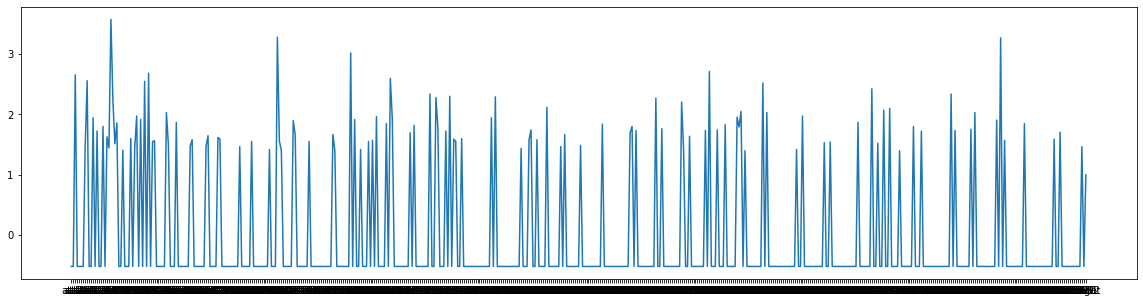

In [14]:
plt.figure(figsize=(20,5))
plt.plot(row);

In [15]:
row

att1     -0.518009
att2     -0.518009
att3      2.654211
att4     -0.518009
att5     -0.518009
            ...   
att509   -0.518009
att510   -0.518009
att511    1.465826
att512   -0.518009
target        b'1'
Name: 0, Length: 513, dtype: object